In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
train=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Titanic_Survival_Prediction\Kaggle Data\train.csv")

In [3]:
test=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Titanic_Survival_Prediction\Kaggle Data\test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

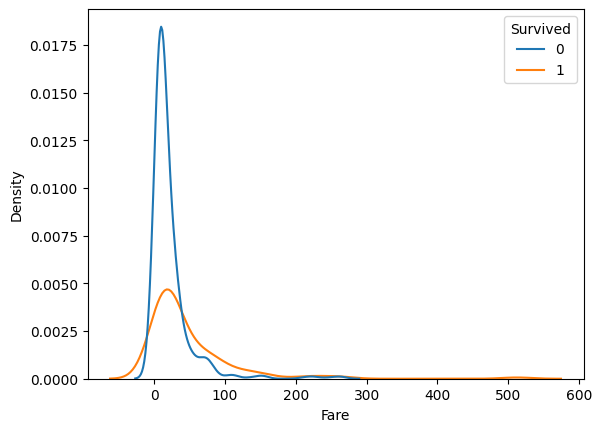

In [8]:
sns.kdeplot(x="Fare",hue="Survived",data=train)

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Parch', ylabel='Count'>

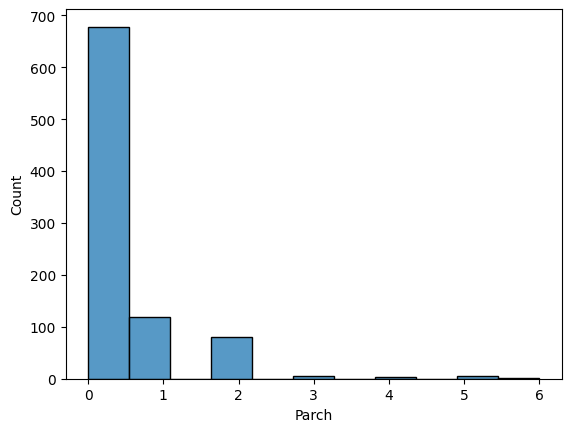

In [10]:
sns.histplot(train["Parch"])

<Axes: xlabel='SibSp', ylabel='Count'>

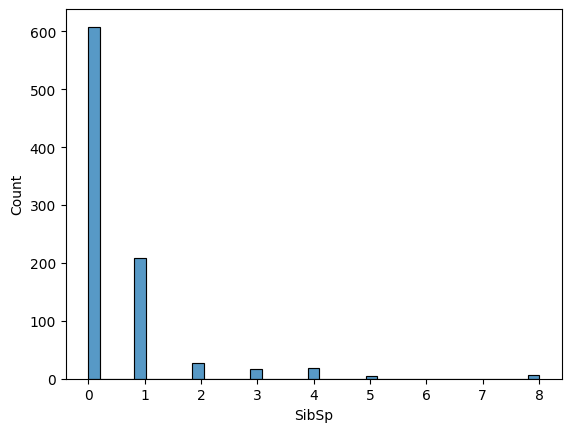

In [11]:
sns.histplot(train["SibSp"])

In [12]:
train["family"]=train["Parch"] + train["SibSp"] +1
test["family"]=test["Parch"] + test["SibSp"]+1
test["Fare"]=test["Fare"].fillna(value=test["Fare"].mean())

In [13]:
train['FarePerPerson'] = train['Fare'] / train['family']

In [14]:
test["FarePerPerson"]=test["Fare"]/test["family"]

In [15]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
family             0
FarePerPerson      0
dtype: int64

In [16]:
test.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age               86
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
family             0
FarePerPerson      0
dtype: int64

In [17]:
train["Embarked"]=train["Embarked"].fillna(value=train["Embarked"].mode()[0])

In [18]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
family             0
FarePerPerson      0
dtype: int64

In [19]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,FarePerPerson
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,3.5000


In [20]:
train=train.drop(["PassengerId","Name","Ticket","Cabin","SibSp","Parch"],axis=1)

In [21]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,FarePerPerson
0,0,3,male,22.0,7.2500,S,2,3.62500
1,1,1,female,38.0,71.2833,C,2,35.64165
2,1,3,female,26.0,7.9250,S,1,7.92500
3,1,1,female,35.0,53.1000,S,2,26.55000
4,0,3,male,35.0,8.0500,S,1,8.05000


In [22]:
test=test.drop(["PassengerId","Name","Ticket","Cabin","SibSp","Parch"],axis=1)

In [23]:
test.head(3)

,Pclass,Sex,Age,Fare,Embarked,family,FarePerPerson
0,3,male,34.5,7.8292,Q,1,7.8292
1,3,female,47.0,7.0000,S,2,3.5000
2,2,male,62.0,9.6875,Q,1,9.6875


In [24]:
train.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
Fare               0
Embarked           0
family             0
FarePerPerson      0
dtype: int64

In [25]:
test.isnull().sum()

Pclass            0
Sex               0
Age              86
Fare              0
Embarked          0
family            0
FarePerPerson     0
dtype: int64

In [26]:
test["Fare"]=test["Fare"].fillna(value=test["Fare"].mean())

In [27]:
test.isnull().sum()

Pclass            0
Sex               0
Age              86
Fare              0
Embarked          0
family            0
FarePerPerson     0
dtype: int64

In [28]:
transformer=ColumnTransformer(
    transformers=[
        ("knn",KNNImputer(weights="distance"),["Age"]),
        ("OHE",OneHotEncoder(sparse_output=False,drop="first"),["Sex","Embarked"]),



    ],remainder="passthrough"

    
)

In [29]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,FarePerPerson
0,0,3,male,22.0,7.2500,S,2,3.62500
1,1,1,female,38.0,71.2833,C,2,35.64165
2,1,3,female,26.0,7.9250,S,1,7.92500
3,1,1,female,35.0,53.1000,S,2,26.55000
4,0,3,male,35.0,8.0500,S,1,8.05000


In [30]:
X=train.iloc[:,1:]

In [31]:
X

,Pclass,Sex,Age,Fare,Embarked,family,FarePerPerson
0,3,male,22.0,7.2500,S,2,3.62500
1,1,female,38.0,71.2833,C,2,35.64165
2,3,female,26.0,7.9250,S,1,7.92500
3,1,female,35.0,53.1000,S,2,26.55000
4,3,male,35.0,8.0500,S,1,8.05000
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,1,13.00000
887,1,female,19.0,30.0000,S,1,30.00000
888,3,female,NaN,23.4500,S,4,5.86250
889,1,male,26.0,30.0000,C,1,30.00000


In [32]:
test.head(1)

,Pclass,Sex,Age,Fare,Embarked,family,FarePerPerson
0,3,male,34.5,7.8292,Q,1,7.8292


In [33]:
y=train["Survived"]

In [34]:
X_trf=transformer.fit_transform(X)

In [35]:
test_trf=transformer.transform(test)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
X_train_scaled=scaler.fit_transform(X_trf)

In [38]:
X_test_scaled=scaler.transform(test_trf)

In [39]:
y.shape

(891,)

In [40]:
X_train_scaled.shape

(891, 8)

In [41]:
X_test_scaled.shape

(418, 8)

## Applying the Model


In [42]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_scaled,y)

LogisticRegression()

In [43]:
from sklearn.model_selection import cross_val_score
model=cross_val_score(LogisticRegression(),X_train_scaled,y,n_jobs=-1,cv=10,scoring="accuracy")

In [44]:
np.mean(model)

0.7946441947565542

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfcval=cross_val_score(rfc,X_train_scaled,y,n_jobs=-1,cv=10,scoring="accuracy")
np.mean(rfcval)

0.8092134831460674

In [46]:
from xgboost import XGBRFClassifier
rfxgb=XGBRFClassifier()
rfxgbs=cross_val_score(rfxgb,X_train_scaled,y,n_jobs=-1,cv=10,scoring="accuracy")
np.mean(rfxgbs)

0.8305867665418228

In [47]:
from xgboost import XGBClassifier
xgbc=cross_val_score(XGBClassifier(),X_train_scaled,y,n_jobs=-1,cv=10,scoring="accuracy")
np.mean(xgbc)

0.8181897627965045

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=cross_val_score(GradientBoostingClassifier(),X_train_scaled,y,n_jobs=-1,scoring="accuracy")
np.mean(gbc)

0.827185989580064

In [49]:
from lightgbm import LGBMClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:

model2=RandomForestClassifier(n_estimators=300,max_depth=7)
model3=GradientBoostingClassifier()
model4=XGBClassifier()
model5=XGBRFClassifier()


In [52]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[

    ('rf', model2), 
    ('gbc', model3),
    ("xgb",model4),("xgbrf",model5)], voting='hard')

In [53]:
voting_clf.fit(X_train_scaled,y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=7,
                                                     n_estimators=300)),
                             ('gbc', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_typ...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              random_state=None, reg_alpha=None, ...))])

In [54]:
predictions=voting_clf.predict(X_test_scaled)

In [55]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
test=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Titanic_Survival_Prediction\Kaggle Data\test.csv")
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# Save the DataFrame to a CSV file
submission.to_csv('submission8.csv', index=False)